In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
data = pd.read_csv("sample_spectrum.csv")

In [4]:
data.head()

,Energies (eV),Cu1.5Te-629332-full/Cu1.0
0,8970.00,0.03
1,8970.81,0.03
2,8971.62,0.03
3,8972.42,0.04
4,8973.23,0.04


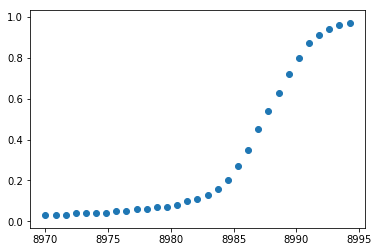

In [16]:
plt.scatter(data["Energies (eV)"].head(31), data["Cu1.5Te-629332-full/Cu1.0"].head(31))

In [7]:
# first use calculus to determine the point
# still working on this part, here choose point manually

In [74]:
x = data["Energies (eV)"].head(31)
y = data["Cu1.5Te-629332-full/Cu1.0"].head(31)

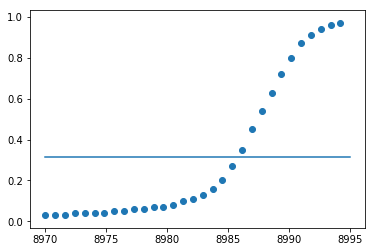

In [76]:
def gaussian_func2(x, a, x0, sigma,c):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + c


popt, pcov = curve_fit(gaussian_func2, x, y)

xplot = np.linspace(8970,8995)
plt.scatter(x,y)
plt.plot(xplot,gaussian_func2(xplot,*popt))

plt.show() 

In [36]:
from scipy.stats import halfnorm

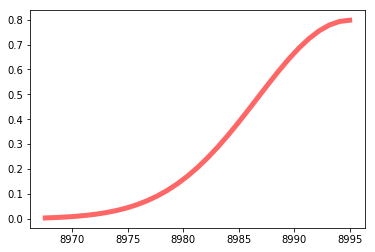

In [82]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = halfnorm.stats(moments='mvsk')
x_fit = np.linspace(halfnorm.ppf(0.001),
halfnorm.ppf(0.999), 31)
ax.plot(-x_fit*(25/3)+8995, halfnorm.pdf(x_fit),'r-', lw=5, alpha=0.6, label='halfnorm pdf')

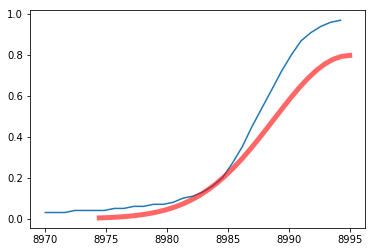

In [83]:
plt.plot(x,y)
plt.plot(-x_fit*(25/4)+8995, halfnorm.pdf(x_fit),'r-', lw=5, alpha=0.6, label='halfnorm pdf')